In [48]:
%load_ext autoreload
%autoreload 2

import numpy as np
from tqdm.auto import tqdm

from modules.data_manage.load_mnist import load_mnist
from modules.grammar.grammar import Grammar
from modules.grammar.merge.stupid_merge_same_nodes import stupid_merge_same_nodes
from modules.plots.draw_imgs import draw_imgs
from modules.plots.plot_random_from_grammar import plot_random_from_grammar
from modules.utils import inject_jupyter_style

inject_jupyter_style()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
x_train, y_train, x_test, y_test = load_mnist(size=1000)
# draw_imgs(x_train, (2, 7), random=False)

Train: (1000, 32, 32) (1000,)
Test:  (1000, 32, 32) (1000,)


In [50]:
grammar = Grammar(colors=x_train.max() + 1)
grammar.add_images(x_train[y_train == 0])

  0%|          | 0/97 [00:00<?, ?it/s]

In [51]:
stupid_merge_same_nodes(grammar)

  0%|          | 0/19780 [00:00<?, ?it/s]

  0%|          | 0/14439 [00:00<?, ?it/s]

  0%|          | 0/10058 [00:00<?, ?it/s]

  0%|          | 0/6758 [00:00<?, ?it/s]

  0%|          | 0/4585 [00:00<?, ?it/s]

  0%|          | 0/3830 [00:00<?, ?it/s]

  0%|          | 0/3694 [00:00<?, ?it/s]

  0%|          | 0/3645 [00:00<?, ?it/s]

  0%|          | 0/3638 [00:00<?, ?it/s]

(19780, 3638)

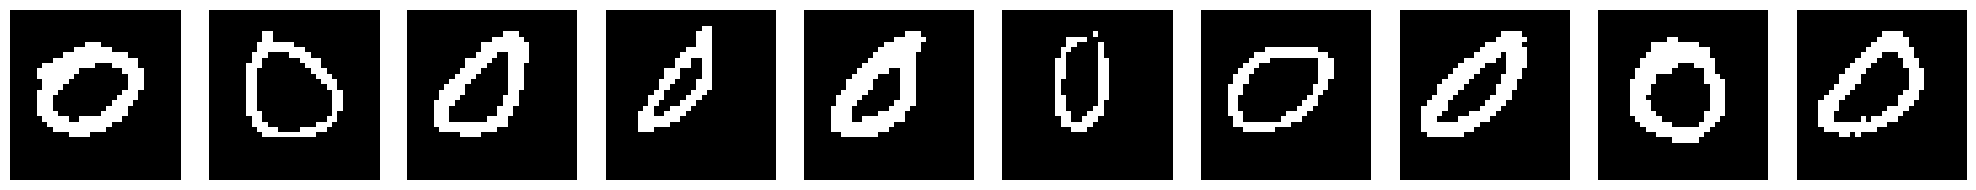

In [52]:
plot_random_from_grammar(grammar, (10,))

In [53]:
for img in tqdm(x_train[y_train == 0]):
    if not grammar.is_image_in_grammar(img):
        print("bad!")

  0%|          | 0/97 [00:00<?, ?it/s]

In [ ]:
grammar.set_height_for_all_nodes()

height,0,1,2,3,4,5,6,7,8,9,10,11
number of nodes,2,4,30,182,431,902,839,589,369,194,97,1
